Name: Rudy Orre  
Section: 0130  
Date: 2 May 2021

# Optional Lab: Conditional Probability

This lab is an introduction conditional probabilities. 

The lab includes a visualization called an *icon array*. It's meant to be an instructional part of the lab to help build intuitions about conditional probability.  These visualizations do not appear in the textbook.

In [1]:
pip install gofer-grader

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', UserWarning)

# This line loads the visualization code for this lab.
import visualizations

# Don't change this cell; just run it. 
from gofer.ok import check

## 1. What is conditional probability good for?

Suppose we have a known population, like all dogs in California.  So far, we've seen 3 ways of *predicting* something about an individual in that population, given incomplete knowledge about the identity of the individual:

* If we know nothing about the individual dog, we could predict that its speed is the *average* or *median* of all the speeds in the population.
* If we know the dog's height but not its speed, we could use *linear regression* to predict its speed from its height.  The resulting prediction is still imperfect, but it might be more accurate than the population average.
* If we know the dog's breed, height, and age, we could use *nearest-neighbor classification* (or *multiple regression*) to predict its speed by comparing to a collection of dogs with known speed.

Computing conditional probabilities is a different way of making predictions.  It differs in at least two important ways from the methods we've seen:
1. We will obtain a probability for each outcome 
2. In the simple (but important) cases we'll look at today, conditional probabilities can be calculated exactly from assumptions, rather than being estimated from data. 

## 2. Icon arrays
Parts 3 and 4 of this lab are about disease, but first let's start with a simple, contrived example.

Imagine you are a marble.  You don't know what you look like (since you obviously have no eyes), but you know that Samantha drew you **uniformly at random** from a bag that contained the following marbles:
* 4 large shiny marbles,
* 1 large dull marble,
* 6 small shiny marbles, and
* 2 small dull marbles.

**Question 2.1.** <br/>Knowing only what we've told you so far, what's the probability that you're a large shiny marble?

In [3]:
probability_large_shiny = 4/13

In [4]:
check('tests/q21.py')

Here's a table with those marbles:

In [5]:
marbles = Table.read_table("marbles.csv")
marbles.show()

surface,size
shiny,large
shiny,large
shiny,large
shiny,large
dull,large
shiny,small
shiny,small
shiny,small
shiny,small
shiny,small


Here are the counts of each type of marble in a pivot table.

In [6]:
marbles.pivot('surface', 'size')

size,dull,shiny
large,1,4
small,2,6


Here are all the differnet combinations of surface and size, with counts, where each type of marble appears in its own row.

In [7]:
marbles.group(['surface', 'size'])

surface,size,count
dull,large,1
dull,small,2
shiny,large,4
shiny,small,6


We've included some code to display something called an *icon array*.  The functions in the cell below create icon arrays from various kinds of tables. Make sure to read the doc strings for each function so you understand what they do!  Refer back to this cell later when you need to make an icon array.

In [8]:
# Run this cell.

#######################################################################
# The functions you'll need to actually use are in here.  Each is a
# way of making an icon array from a differently-formatted table.
#######################################################################

def display_icon_array(table, groups, individuals_name):
    """
    Given a table and some columns to group it on, displays an icon array
    of the groups.
    
    groups should be an array of labels of columns in table.
    
    individuals_name is your name for the individual rows of table.
    For example, if we're talking about a population of people,
    individuals_name should be "people".
    
    For example:
    
    display_icon_array(marbles, ["surface", "size"], "marbles")
    """
    display_grouped_icon_array(table.group(groups), individuals_name)

def display_grouped_icon_array(grouped_data, individuals_name):
    """
    Given a table with counts for data grouped by 1 or more categories,
    displays an icon array of the groups represented in the table.
    
    grouped_data should be a table of frequencies or counts, such as
    a table created by calling the groups method on some table.
    
    individuals_name is your name for the individual members of the
    dataset.  For example, if we're talking about a population of
    people, individuals_name should be "people".
    
    For example:
    
    display_grouped_icon_array(marbles.group(["surface", "size"]), "marbles")
    """
    visualizations.display_combinations(grouped_data, individuals_name=individuals_name)

def display_crosstab_icon_array(crosstabulation, x_label, individuals_name):
    """
    Given a crosstabulation table, displays an icon array of the groups
    represented in the table.
    
    crosstabulation should be a table of frequencies or counts created by
    calling pivot on some table.
    
    x_label should be the label of the categories listed as columns (on
    the "x axis" when the crosstabulation table is printed).
    
    individuals_name is your name for the individual members of the
    dataset.  For example, if we're talking about a population of
    people, individuals_name should be "people".
    
    For example:
    
    display_crosstab_icon_array(marbles.pivot("surface", "size"), "surface", "marbles")
    """
    display_grouped_icon_array(visualizations.pivot_table_to_groups(crosstabulation, x_label), individuals_name)

Here's an icon array of all the marbles, grouped by surface and size:

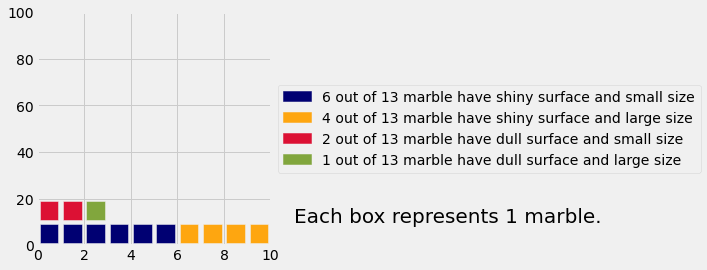

In [9]:
# Run this cell.
display_grouped_icon_array(marbles.group(["surface", "size"]), "marble")

You (the marble) should imagine that you are a random draw from these 13 icons.

The following is an icon array of the marbles, grouped **only by their surface (shiny/dull)**.

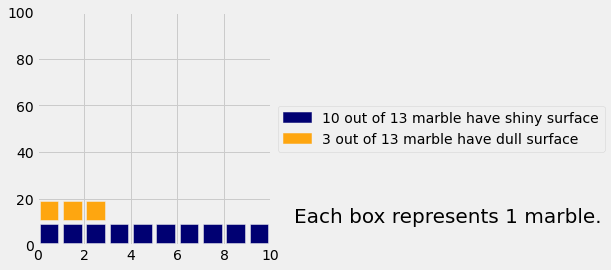

In [10]:
display_grouped_icon_array(marbles.group("surface"), "marble")

Knowing nothing else about yourself, you're equally likely to be any of the marbles pictured.

**Question 2.2.**<br/> What's the probability that you're a shiny marble?  Calculate this by hand (using Python for arithmetic) by looking at your icon array.

In [11]:
probability_shiny = 10/13

In [12]:
check('tests/q22.py')

### 2.1. Conditional probability

Suppose you overhear Samantha saying that you're a large marble.  (Little-known fact: though marbles cannot see, they can sense sound from surface vibrations.)  Does this somehow change the chance that you're shiny?  Let's find out.

Go back to the full icon array, displayed below for convenience.

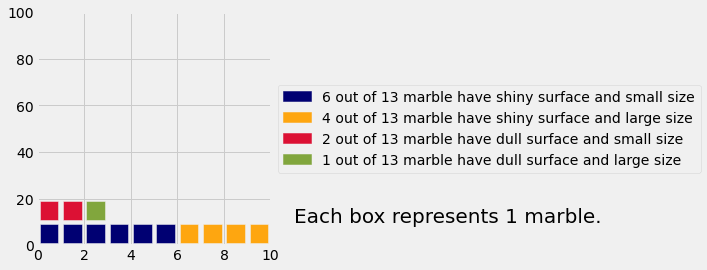

In [13]:
display_grouped_icon_array(marbles.group(["surface", "size"]), "marble")

In question 2.3, we assumed you were equally likely to be any of the marbles, because we didn't know any better.  That's why we looked at all the marbles to compute the probability you were shiny.

But assuming you're a large marble, we can eliminate some of these possibilities.  In particular, you can't be a small shiny marble or a small dull marble.

You're still equally likely to be any of the remaining marbles, because you don't know anything that says otherwise.  So here's an icon array of those remaining possibilities:

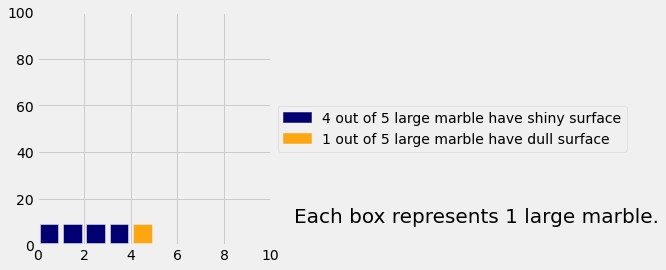

In [14]:
# Just run this cell.
display_grouped_icon_array(marbles.where("size", "large").group("surface"), "large marble")

**Question 2.1.1.** What's the probability you're a shiny marble, knowing that you're a large marble?  Calculate it by hand, using the icon array.

In [15]:
probability_shiny_given_large = 4/5

In [16]:
check('tests/q211.py')

You should have found that this is different from the probability that you're a shiny marble (given no size information), which you computed earlier.  The distribution of surfaces among the large marbles is a little different from the distribution of surfaces among all the marbles.

**Question 2.1.2.** <br/>Suppose instead Samantha had said you're a **shiny** marble (hooray!).  What's the probability you're large?  Make an icon array to help you compute this probability, then compute it.

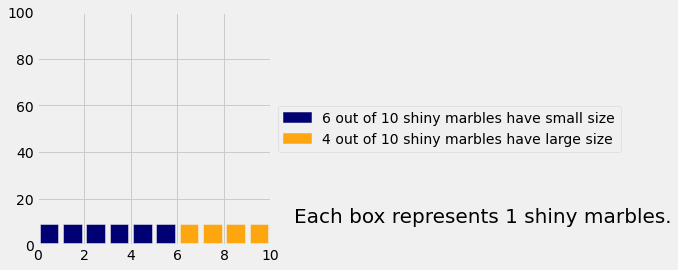

In [17]:
# An icon array to help you compute the answer.
display_grouped_icon_array(marbles.where("surface", "shiny").group("size"), "shiny marbles")

In [18]:
# Now compute the answer.
probability_large_given_shiny = 4/10

In [19]:
check('tests/q212.py')

**Question 2.1.3.** <br/>Can you answer the last two questions just by looking at the full icon array?  (You can run the cell below to see it again.). If you can, how? If not, why not? Check with your lab peers to see if you are on the right track. 

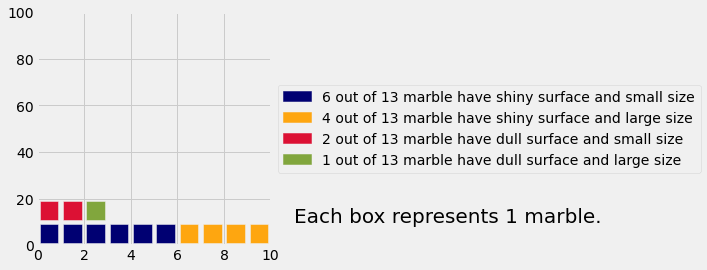

In [20]:
# Just run this cell.  The next cell is where you should write your answer.
display_grouped_icon_array(marbles.group(["surface", "size"]), "marble")

Although it is a little more difficult to do so, it is completely doable. So for example, if I wanted to know that the probability of a marble being large given it is shiny, I can just look at the boxes that represent shiny marbles, which are the blue and yellow ones. There are 10 total shiny marbles. I can also see that of the shiny marbles, there are 4 that are large, which are yellow. This means that the probability of getting a large marble given it is shiny would be 4 divided by 10, or 40%.

## 3. Cancer screening
Now let's look at a much more realistic application.

### Background
Medical tests are an important but surprisingly controversial topic.  For years, women have been advised to get regular mammograms (tests for breast cancer).  Today, there is controversy over whether the tests are useful at all.

Part of the problem with such tests is that they are not perfectly reliable.  Someone without cancer, or with only a benign form of cancer, can see a positive result on a test for cancer.  Someone with cancer can receive a negative result.  ("Positive" means "pointing toward cancer," so in this context it's bad!)  Doctors and patients often deal poorly with the first case, called *false positives*.  For example, a patient may receive dangerous treatment like chemotherapy or radiation despite having no cancer or, as happens more frequently, having a cancer that would not have impacted their health.

Conditional probability is a good way to think about such situations.  For example, you can compute the chance that you have cancer **given the results of a diagnostic test** by combining information from different probability distributions.  You'll see that the chance you have cancer can be far from 100% even if you have a positive test result from a test that is usually accurate.

### 3.1. Basic cancer statistics
Suppose that, in a representative group of 10,000 people who are tested for cancer ("representative" meaning that the frequencies of different things are the same as the frequencies in the whole population):
1. 100 have cancer.
2. Among those 100, 90 have positive results on a cancer test and 10 have negative results.  ("Negative" means "not pointing toward cancer.")
3. The other 9,900 don't have cancer.
4. Among these, 198 have positive results on a cancer test and the other 9,702 have negative results.  (So 198 see "false positive" results.)

Below we've generated a table with data from these 10,000 hypothetical people.

In [21]:
people = Table().with_columns(
    "cancer status", ["sick", "sick", "healthy", "healthy"],
    "test status", ["positive", "negative", "positive", "negative"],
    "count", [90, 10, 198, 9702])
people

cancer status,test status,count
sick,positive,90
sick,negative,10
healthy,positive,198
healthy,negative,9702


One way to visualize this dataset is with a contingency table, which you've seen before.

**Question 3.1.1.** <br/>Create a contingency table that looks like this:

|cancer status|negative|positive|
|-|-|-|
|sick|||
|healthy||||

...with the **count** of each group filled in, according to what we've told you above.  The counts in the 4 boxes should sum to 10,000.

*Hint:* Use `pivot` with the `sum` function.

In [22]:
cancer = people.pivot(columns='test status', rows='cancer status', values='count', collect=np.sum)
cancer

cancer status,negative,positive
healthy,9702,198
sick,10,90


In [23]:
check('tests/q311.py')

Here is the `people` data in an icon array.

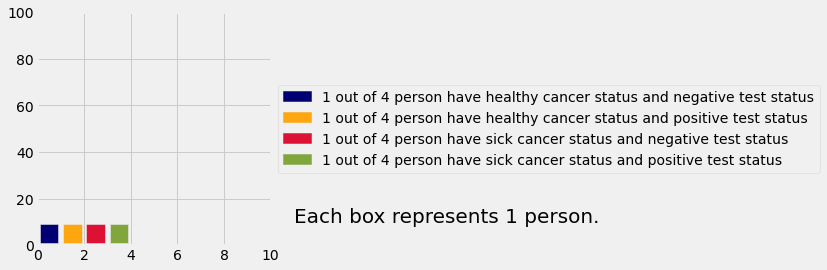

In [24]:
display_grouped_icon_array(people.group(['cancer status', 'test status']), individuals_name='person')

Now let's think about how you can use this kind of information when you're tested for cancer.

Before you know any information about yourself, you could imagine yourself as a **uniform random sample** of one of the 10,000 people in this imaginary population of people who have been tested.

What's the chance that you have cancer, knowing nothing else about yourself?  It's $\frac{100}{10000}$, or 1%.  We can see that more directly with this icon array:

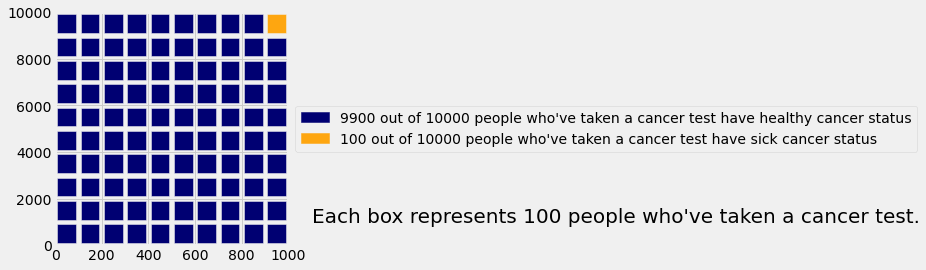

In [25]:
by_health = people.select(0, 2).group(0, sum).relabeled(1, 'count')
display_grouped_icon_array(by_health, "people who've taken a cancer test")

**Question 3.1.3.** <br/>What's the chance that you have a positive test result, knowing nothing else about yourself?

*Hint:* Make an icon array.

In [26]:
by_health

cancer status,count
healthy,9900
sick,100


In [27]:
by_test = people.select('test status', 'count').group('test status', np.sum).relabeled('count sum', 'count')
by_test

test status,count
negative,9712
positive,288


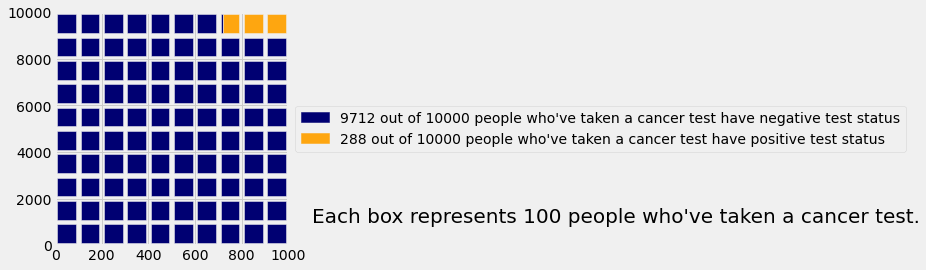

In [28]:
#First, make an icon table similar to the one above
#by_test should be almost the same thing as by_health above
#The only difference is the columns we need from the people table
by_test = people.select('test status', 'count').group('test status', np.sum).relabeled('count sum', 'count')
display_grouped_icon_array(by_test, "people who've taken a cancer test")

In [29]:
# Fill in the probabiliy of having a positive test result.
probability_positive_test = 288 / 10000

In [30]:
check('tests/q313.py')

### 3.2. Interpreting test results
Suppose you have a positive test result.  This means you can now narrow yourself down to being part of one of two groups:
1. The people with cancer who have a positive test result.
2. The people without cancer who have a positive test result.

Here's an icon array for those two groups:

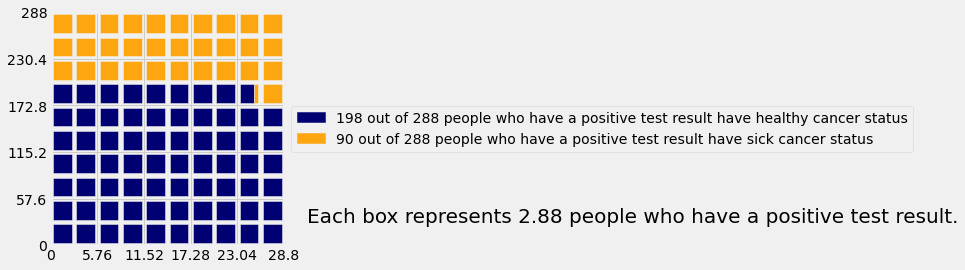

In [31]:
# Just run this cell.
display_grouped_icon_array(people.where("test status", are.equal_to("positive")).drop(1), "people who have a positive test result")

The *conditional probability* that you have cancer *given* your positive test result is the chance that you're in the first group, assuming you're in one of these two groups.

**Question 3.2.1.** <br/>Eyeballing it, is the conditional probability that you have cancer given your positive test result closest to:

9/10

2/3

1/2

1/3

1/100


In [32]:
# Set this to one of the probabilities above.
rough_prob_sick_given_positive = 1/3

In [33]:
check('tests/q321.py')

**Question 3.2.2.** <br/>Now write code to calculate that probability exactly, using the original contingency table you wrote (the `cancer` table).

In [34]:
#Run this cell to take another look at the cancer cell
cancer

cancer status,negative,positive
healthy,9702,198
sick,10,90


In [35]:
prob_sick_given_positive = 90/288
prob_sick_given_positive

0.3125

In [36]:
check('tests/q322.py')

**Question 3.2.3.** <br/>Look at the full icon array again.  Using that, how would you compute (roughly) the conditional probability of cancer given a positive test?

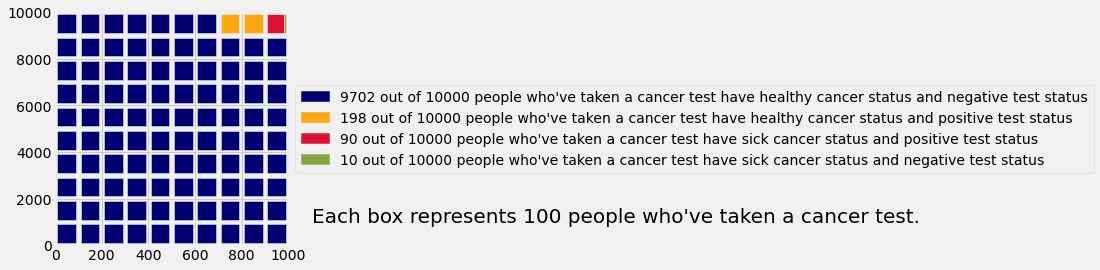

In [37]:
# The full icon array is given here for your convenience.
# Write your answer in the next cell.
display_grouped_icon_array(people, "people who've taken a cancer test")

The postive test people take up roughly three boxes (each 100 people), where two of the boxes are positive test people who turn out to be healthy, and the other box is for positive test people who are in fact sick. This would mean that given the condition of a positive test, it would mean that there is only about a 1/3 chance of actually have cancer.

**Question 3.2.4.** <br/>Is your answer to question 3.2.2 bigger than the overall proportion of people in the population who have cancer?  Does that make sense? Check with your peers in lab to see if you have the right idea. 

The proportion of sick people out of the subset of positive people is `P(sick|positive test) = 0.3125`. The proportion of sick people out of the set of all people is `P(sick) = 0.01`. So yes, the proportion of sick given positive is greater than the overall proportin of people in the population who have cancer. This makes sense because if you test positive, you are simply more likely to have cancer than someone who doesn't test, since they're more likely to be healthy given they're from the average population of people, where it is unlikely to have cancer.

# 4. Tree diagrams
A tree diagram is another useful visualization for conditional probability.  It is easiest to draw a tree diagram when the probabilities are presented in a slightly different way.  For example, people often summarize the information in your `cancer` table using 3 numbers:

1. The overall probability of having cancer is **`p_cancer`**.  (This is called the *base rate* or *marginal probability* of the disease.)
2. Given that you have cancer, the probability of a positive test result is **`p_pos_given_cancer`**.  (This is called the *sensitivity* of the test.  Higher values of `p_pos_given_cancer` mean the test is more useful.)
3. Given that you don't have cancer, the probability of a positive test result is **`p_pos_given_nocancer`**.  (This is called the *false positive rate* of the test.  Higher values of `p_pos_given_nocancer` mean the test is less useful.)

You already saw that the base rate of cancer was .01 in the previous section.  `p_pos_given_cancer` and `p_pos_given_nocancer` can be computed using the same method you used to compute the conditional probability of cancer given a positive test result.

Use the tree diagram below and think about 

This corresponds to this tree diagram:

                      / \
                 .99 /   \ .01
                    /     \ 
                   /       \
              no cancer    cancer
                / \         / \
               /   \       /   \
              /     \     /     \
             +       -   +       -

**Question 4.1.** <br/>Compute `p_pos_given_cancer` and `p_pos_given_nocancer` for the data in section 3.  

**Use Bayes Rule**

You can read about a technique called Bayes Rule in the [course textbook](https://www.inferentialthinking.com/chapters/18/1/more-likely-than-not-binary-classifier.html#Bayes%27-Rule).

In [38]:
cancer

cancer status,negative,positive
healthy,9702,198
sick,10,90


In [39]:
# Hint: You may find these two tables useful:
has_cancer = cancer.where("cancer status", are.equal_to("sick"))
no_cancer = cancer.where("cancer status", are.equal_to("healthy"))

p_cancer = .01
p_pos_given_cancer = 90 / 100
p_pos_given_nocancer = 198 / 9900

print('Probability of Cancer:', p_cancer, '\nProbability of a positive test given no cancer:', p_pos_given_cancer, 
      '\nProbability of a positive test given no cancer:', p_pos_given_nocancer)

Probability of Cancer: 0.01 
Probability of a positive test given no cancer: 0.9 
Probability of a positive test given no cancer: 0.02


In [40]:
check('tests/q41.py')

## Submission

There is no way to submit this optional lab, but you are welcome to check your work with the cell below.

In [41]:
# For your convenience, you can run this cell to run all the tests at once!
import glob
from gofer.ok import grade_notebook
if not globals().get('__GOFER_GRADER__', False):
    display(grade_notebook('optional.ipynb', sorted(glob.glob('tests/q*.py'))))

Probability of Cancer: 0.01 
Probability of a positive test given no cancer: 0.9 
Probability of a positive test given no cancer: 0.02
['tests/q21.py', 'tests/q22.py', 'tests/q211.py', 'tests/q212.py', 'tests/q311.py', 'tests/q313.py', 'tests/q321.py', 'tests/q322.py', 'tests/q41.py']
Question 1:


Question 2:


Question 3:


Question 4:


Question 5:


Question 6:


Question 7:


Question 8:


Question 9:


Question 10:


Question 11:


Question 12:


Question 13:


Question 14:


Question 15:


Question 16:


Question 17:


Question 18:


1.0

Name: Rudy Orre  
Section: 0130  
Date: 2 May 2021